In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

<IPython.core.display.Javascript object>

In [3]:
ess = pd.read_csv("ess_combined_2012_2014.csv")

<IPython.core.display.Javascript object>

In [4]:
ess.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1


<IPython.core.display.Javascript object>

In [5]:
ess["year"].unique()
ess12 = ess[ess["year"] == 6]
ess14 = ess[ess["year"] == 7]

<IPython.core.display.Javascript object>

(array([109.,  88., 224., 326., 369., 826., 516., 759., 625., 234.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

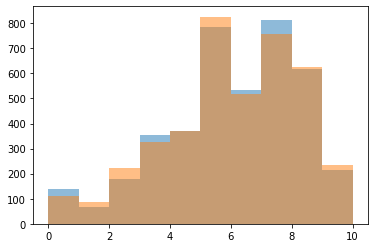

<IPython.core.display.Javascript object>

In [6]:
plt.hist(ess12["ppltrst"], alpha=0.5)
plt.hist(ess14["ppltrst"], alpha=0.5)

In [7]:
stats.describe(ess12["ppltrst"])

DescribeResult(nobs=4071, minmax=(0, 10), mean=5.578481945467944, variance=4.893040545067073, skewness=-0.5431086926347095, kurtosis=-0.1210956960964813)

<IPython.core.display.Javascript object>

In [8]:
stats.describe(ess14["ppltrst"])

DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.927171652708959, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)

<IPython.core.display.Javascript object>

In [9]:
stats.ttest_ind(ess12["ppltrst"], ess14["ppltrst"])

Ttest_indResult(statistic=0.1443685081969842, pvalue=0.8852130548889106)

<IPython.core.display.Javascript object>

In [10]:
# stats are normal enough to run just a regular t-test. It appears not to be a significant change

<IPython.core.display.Javascript object>

## 2

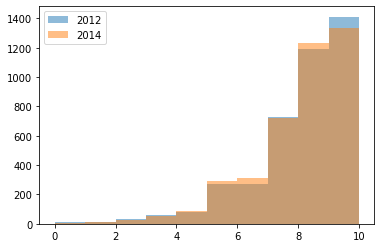

<IPython.core.display.Javascript object>

In [11]:
plt.hist(ess12["happy"], alpha=0.5, label="2012")
plt.hist(ess14["happy"], alpha=0.5, label="2014")
plt.legend()
# definitely not normal distribution

In [12]:
stats.mannwhitneyu(ess12["happy"], ess14["happy"])

MannwhitneyuResult(statistic=8096343.0, pvalue=0.02679503248642277)

<IPython.core.display.Javascript object>

In [13]:
stats.median_test(ess12["happy"], ess14["happy"])

(3.0630364166228192,
 0.08009187238130255,
 8.0,
 array([[1411, 1337],
        [2660, 2739]], dtype=int64))

<IPython.core.display.Javascript object>

In [14]:
stats.kruskal(ess12["happy"], ess14["happy"])

KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)

<IPython.core.display.Javascript object>

In [15]:
# I think we can say with confidence that happiness did raise between 2012 and 2014

<IPython.core.display.Javascript object>

## 3

In [16]:
import random

cntr = random.sample(list(ess["cntry"].unique()), 3)

<IPython.core.display.Javascript object>

In [17]:
cntrdfs = []
for c in cntr:
    temp = ess[ess["cntry"] == c]
    cntrdfs.append(temp)

ess_filt = pd.concat(cntrdfs)

<IPython.core.display.Javascript object>

In [18]:
ess_filt["cntry"].unique()

array(['ES', 'CZ', 'NO'], dtype=object)

<IPython.core.display.Javascript object>

In [19]:
ess_filt = ess_filt[ess_filt["year"] == 7]

<IPython.core.display.Javascript object>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024AB4EE9D08>,
      dtype=object)

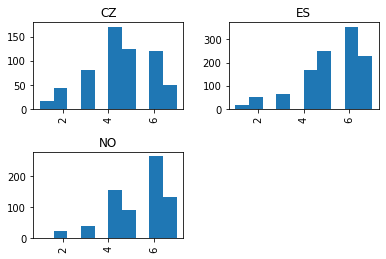

<IPython.core.display.Javascript object>

In [20]:
ess_filt["sclmeet"].hist(by=ess_filt["cntry"])

In [21]:
a14 = ess_filt[ess_filt["cntry"] == ess_filt["cntry"].unique()[0]]
b14 = ess_filt[ess_filt["cntry"] == ess_filt["cntry"].unique()[1]]
c14 = ess_filt[ess_filt["cntry"] == ess_filt["cntry"].unique()[2]]

<IPython.core.display.Javascript object>

In [22]:
stats.kruskal(a14["sclmeet"], b14["sclmeet"], c14["sclmeet"])

KruskalResult(statistic=137.99764626257172, pvalue=1.0819117969116348e-30)

<IPython.core.display.Javascript object>

In [23]:
tukey = pairwise_tukeyhsd(
    endog=ess_filt["sclmeet"], groups=ess_filt["cntry"], alpha=0.05
)

<IPython.core.display.Javascript object>

In [24]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
CZ,ES,0.7686,0.001,0.6011,0.9362,True
CZ,NO,0.8153,0.001,0.6313,0.9994,True
ES,NO,0.0467,0.7499,-0.1125,0.2059,False


<IPython.core.display.Javascript object>

In [25]:
big_tukey = tukey = pairwise_tukeyhsd(
    endog=ess["sclmeet"], groups=ess["cntry"], alpha=0.05
)

<IPython.core.display.Javascript object>

In [26]:
big_tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
CH,CZ,-0.5367,0.001,-0.6929,-0.3806,True
CH,DE,-0.4832,0.4902,-1.2644,0.298,False
CH,ES,0.0928,0.3611,-0.0415,0.227,False
CH,NO,0.2868,0.001,0.1372,0.4363,True
CH,SE,0.3357,0.001,0.193,0.4783,True
CZ,DE,0.0536,0.9,-0.7292,0.8363,False
CZ,ES,0.6295,0.001,0.4864,0.7726,True
CZ,NO,0.8235,0.001,0.666,0.981,True
CZ,SE,0.8724,0.001,0.7215,1.0234,True
DE,ES,0.5759,0.2831,-0.2028,1.3546,False


<IPython.core.display.Javascript object>

In [27]:
ess.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1


<IPython.core.display.Javascript object>

In [28]:
ruff = pd.read_csv("rfft.csv")

<IPython.core.display.Javascript object>

In [29]:
ruff.head()

,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033
3,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),26.0,3.0,Not applicable
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362


<IPython.core.display.Javascript object>